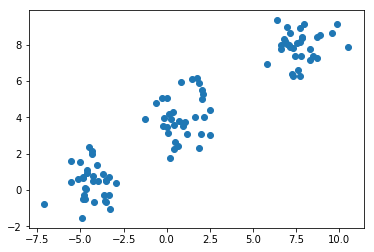

In [15]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

blobs = datasets.make_blobs(n_samples=100, random_state=3)

plt.scatter(blobs[0][:,0], blobs[0][:,1])
plt.show()

In [59]:
data ={0:[51.5217, 30.114, 0], 1:[27.9698, 27.0568, 1], 2:[10.6233, 52.4207, 2], 3:[122.1483, 6.9586, 3], 4:[146.4236, -41.3457, 4]}
k = 2
m = 0
n = 5

In [58]:
data = dict()
for idx, items in enumerate(blobs[0]):
    data.update({idx: list(items)+[idx]})
n = len(blobs[0])
k = 2
m = 0

## Prim

In [16]:
pd.DataFrame(dist_mat)

,0,1,2,3,4
0,inf,23.749494,46.586135,74.325562,118.797556
1,inf,inf,30.728301,96.299156,136.785250
2,inf,inf,inf,120.435162,165.026844
3,inf,inf,inf,inf,54.061036
4,inf,inf,inf,inf,inf


In [9]:
#%%prun
def distance(x,y, m):
    dist = [(x[idx]-y[idx])**2 for idx in range(len(x)-1)]
    return sum(dist)**(1/2)

# Prim
# calculate distance matrix
keys= data.keys()
keys = list(data.keys())
dist_mat = [[float('inf') for key1 in keys] for key2 in keys]
for i in keys:
    for j in keys[i+1:]:
        dist_mat[i][j] = distance(data.get(i), data.get(j), m)

# prim to minimum span tree
min_tree = []
u = [keys[0]]
v = keys[1:]
while len(u) != len(keys):
    dist_list = [(key1,key2, dist_mat[key1][key2]) for key1 in u for key2 in v]
    i,j, dist = min(dist_list, key= lambda x: x[2])
    min_tree.append([i,j, dist])
    u = list(set(sum(list(zip(*min_tree))[:2],())))
    v.remove(j)
    
# add shortest remaining edge in the tree
min_tree = sorted(min_tree, key= lambda data: data[2])


In [67]:
n = len(data)
result_list = []
# min link index
i = 0
while n > k:
    print(n)
    # if min link is linking result clusters
    link=[]
    
    # add minimum link to result
    for idx, result in enumerate(result_list):
        if cluster_list[0].intersection(result):
            link.append(idx)
    
    # cases whether link is in result or not
    if len(link) == 0:
        result_list.append(cluster_list[i])
    elif len(link) ==1:
        new_cluster = result_list[link[0]].union(cluster_list[i])
        result_list.append(new_cluster)
        result_list.pop(link[0])
    else:
        new_cluster = result_list[link[0]].union(cluster_list[i]).union(result_list[link[1]])
        result_list.append(new_cluster)
        result_list.pop(link[0])
        result_list.pop(link[1]-1)
    print(result_list)
    n = len(result_list)+len(cluster_list[i+1:])-1
    i += 1

5
[{0, 1}]
3
[{0, 1, 2}]


In [11]:
# result_list: each cluster before merge
result_list = [key for key in data.keys()]
cluster_list = []
for i, edge in enumerate(min_tree):
    cluster_list.append(set(edge[:2]))

n = len(cluster_list)

def cluster_merge(cluster1, cluster2, cluster_list, i, j):
    merged_cluster = cluster1.union(cluster2)
    print(merged_cluster)
    cluster_list.insert(0, merged_cluster)
    print(cluster_list)
    print('remove:'+str(i+1) )
    print('remove:'+str(j) )
    cluster_list.pop(i+1)
    cluster_list.pop(j)
    return cluster_list

i = 0
j = i+1
while n > k:
    cluster1 = cluster_list[i]
    cluster2 = cluster_list[j]
    if cluster1.intersection(cluster2):
        print('i:'+str(i))
        print('j: '+str(j))
        print(cluster_list)
        cluster_list = cluster_merge(cluster1, cluster2, cluster_list, i, j )
        n = len(cluster_list)
        print(cluster_list)
    else:
        j +=1
        for idx_j in range(i+1, j+1):
            print('i: '+str(i))
            print('idx_j: '+str(idx_j))
            cluster2 = cluster_list[idx_j]
            if cluster1.intersection(cluster2):
                print(cluster_list)
                cluster_list = cluster_merge(cluster1, cluster2, cluster_list, i , idx_j)
                i = 0
                j = i+1
                n = len(cluster_list)
                break

i:0
j: 1
[{0, 1}, {1, 2}, {3, 4}, {0, 3}]
{0, 1, 2}
[{0, 1, 2}, {0, 1}, {1, 2}, {3, 4}, {0, 3}]
remove:1
remove:1
[{0, 1, 2}, {3, 4}, {0, 3}]
i: 0
idx_j: 1
i: 0
idx_j: 2
[{0, 1, 2}, {3, 4}, {0, 3}]
{0, 1, 2, 3}
[{0, 1, 2, 3}, {0, 1, 2}, {3, 4}, {0, 3}]
remove:1
remove:2
